In [3]:
!pip install yfinance pandas matplotlib numpy

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [27]:
def backtest_golden_death_cross(stock_symbol, start_date, end_date):

    # Download stock data from Yahoo Finance
    df = yf.download(stock_symbol, start=start_date, end=end_date)

    
    
    # Calculate 50-day and 200-day moving averages
    df['50_MA'] = df['Adj Close'].rolling(window=50).mean()
    df['200_MA'] = df['Adj Close'].rolling(window=200).mean()
    
    # Identify Golden Cross and Death Cross signals
    df['Signal'] = 0
    df['Signal'][50:] = np.where(df['50_MA'][50:] > df['200_MA'][50:], 1, 0)  # 1 when 50-day MA > 200-day MA
    df['Position'] = df['Signal'].diff()  # 1 for buy, -1 for sell
    
   # Backtest the strategy by tracking percentage returns
    buy_price = None
    returns = []

    for index, row in df.iterrows():
        if row['Position'] == 1:  # Golden Cross (Buy Signal)
            if buy_price is None:  # Buy only if not holding
                buy_price = row['Adj Close']
                print(f"Buying at {row.name.date()} | Price: {row['Adj Close']:.2f}")
        elif row['Position'] == -1:  # Death Cross (Sell Signal)
            if buy_price is not None:  # Sell only if holding
                sell_price = row['Adj Close']
                trade_return = (sell_price - buy_price) / buy_price * 100  # Percentage return
                returns.append(trade_return)
                print(f"Selling at {row.name.date()} | Price: {sell_price:.2f} | Return: {trade_return:.2f}%")
                buy_price = None  # no longer holding 

    # Calculate cumulative return
    total_return = np.sum(returns)
    print(f"Total Return from all trades: {total_return:.2f}%")

    # Plot price chart with signals
    plt.figure(figsize=(12, 8))
    plt.plot(df['Adj Close'], label=f'{stock_symbol} Price', alpha=0.5)
    plt.plot(df['50_MA'], label='50-day MA', color='blue', alpha=0.75)
    plt.plot(df['200_MA'], label='200-day MA', color='orange', alpha=0.75)
   
    
    #Annotate buy/sell signals
    for index, row in df.iterrows():
        if row['Position'] == 1:
            plt.scatter(index, row['Adj Close'], marker='^', color='green', lw=3, label='Buy Signal' if index == 0 else "")
        elif row['Position'] == -1:
            plt.scatter(index, row['Adj Close'], marker='v', color='red', lw=3, label='Sell Signal' if index == 0 else "")
    
    plt.title(f'{stock_symbol} Golden Cross / Death Cross Backtest')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()


[*********************100%***********************]  1 of 1 completed
C:\Users\16095\AppData\Local\Temp\ipykernel_756\2824222997.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Signal'][50:] = np.where(df['50_MA'][50:] > df['200_MA']

Buying at 2015-10-16 | Price: 33.03
Selling at 2016-06-29 | Price: 34.12 | Return: 3.31%
Buying at 2016-08-12 | Price: 39.07
Selling at 2018-11-15 | Price: 53.11 | Return: 35.94%
Buying at 2019-03-27 | Price: 58.51
Selling at 2019-07-17 | Price: 57.18 | Return: -2.27%
Buying at 2019-07-26 | Price: 62.37
Selling at 2020-04-21 | Price: 60.67 | Return: -2.72%
Buying at 2020-06-08 | Price: 72.15
Selling at 2022-03-04 | Price: 131.80 | Return: 82.66%
Total Return from all trades: 116.91%


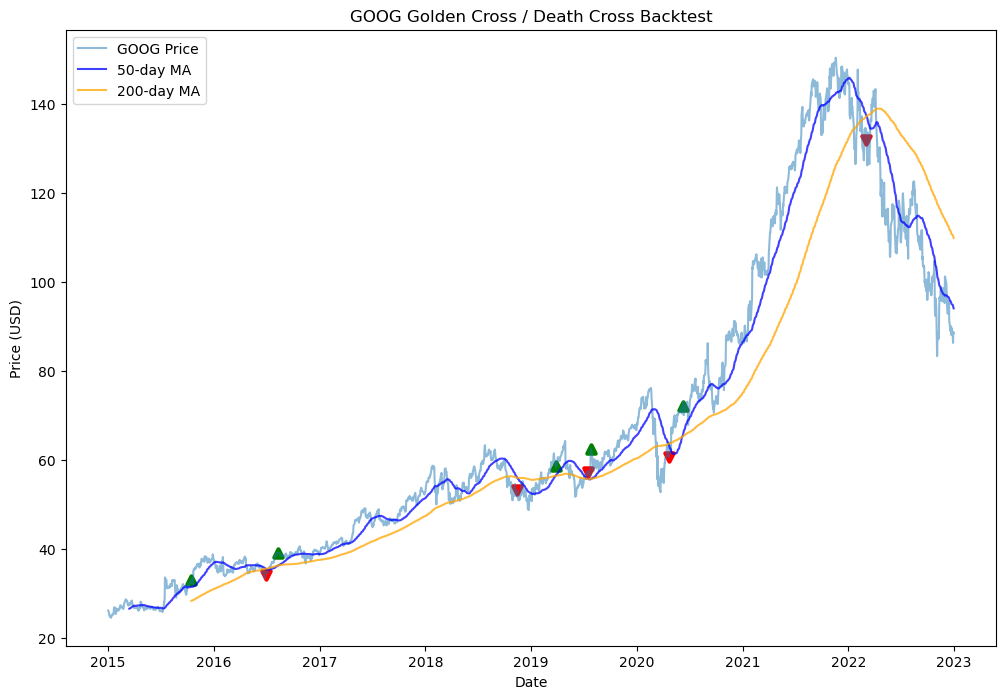

In [28]:
if __name__ == "__main__":
    backtest_golden_death_cross('GOOG', '2015-01-01', '2023-01-01)